<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br> Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 5.  Соревнование Kaggle "Catch Me If You Can"

На этой неделе мы вспомним про концепцию стохастического градиентного спуска и опробуем классификатор Scikit-learn SGDClassifier, который работает намного быстрее на больших выборках, чем алгоритмы, которые мы тестировали на 4 неделе. Также мы познакомимся с данными [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей и сделаем в нем первые посылки. По итогам этой недели дополнительные баллы получат те, кто попадет в топ-30 публичного лидерборда соревнования.

**В этой части проекта Вам могут быть полезны видеозаписи следующих лекций курса "Обучение на размеченных данных":**
   - [Стохатический градиентный спуск](https://www.coursera.org/learn/supervised-learning/lecture/xRY50/stokhastichieskii-ghradiientnyi-spusk)
   - [Линейные модели. Sklearn.linear_model. Классификация](https://www.coursera.org/learn/supervised-learning/lecture/EBg9t/linieinyie-modieli-sklearn-linear-model-klassifikatsiia)
   
**Также рекомендуется вернуться и просмотреть [задание](https://www.coursera.org/learn/supervised-learning/programming/t2Idc/linieinaia-rieghriessiia-i-stokhastichieskii-ghradiientnyi-spusk) "Линейная регрессия и стохастический градиентный спуск" 1 недели 2 курса специализации.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите тетрадку в соответствующем Peer Review. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/1pLsegkAICL9PzOLyAeH9DmDOBfktte0l8JW75uWcTng). 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

**Считаем данные [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки).**

In [2]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = '/Users/zaharsaraev/Documents/Machine_learning_coursera/Final_project/catch-me-if-you-can/'

In [3]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'),
                       index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'),
                      index_col='session_id')

In [4]:
train_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


**Объединим обучающую и тестовую выборки – это понадобится, чтоб вместе потом привести их к разреженному формату.**

In [5]:
train_test_df = pd.concat([train_df, test_df])

В обучающей выборке видим следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   site1   253561 non-null  int64  
 1   time1   253561 non-null  object 
 2   site2   250098 non-null  float64
 3   time2   250098 non-null  object 
 4   site3   246919 non-null  float64
 5   time3   246919 non-null  object 
 6   site4   244321 non-null  float64
 7   time4   244321 non-null  object 
 8   site5   241829 non-null  float64
 9   time5   241829 non-null  object 
 10  site6   239495 non-null  float64
 11  time6   239495 non-null  object 
 12  site7   237297 non-null  float64
 13  time7   237297 non-null  object 
 14  site8   235224 non-null  float64
 15  time8   235224 non-null  object 
 16  site9   233084 non-null  float64
 17  time9   233084 non-null  object 
 18  site10  231052 non-null  float64
 19  time10  231052 non-null  object 
 20  target  253561 non-null  int64  
dtypes: float64

In [7]:
test_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,2014-11-04 10:03:21,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,2014-05-16 15:05:40,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   site1   82797 non-null  int64  
 1   time1   82797 non-null  object 
 2   site2   81308 non-null  float64
 3   time2   81308 non-null  object 
 4   site3   80075 non-null  float64
 5   time3   80075 non-null  object 
 6   site4   79182 non-null  float64
 7   time4   79182 non-null  object 
 8   site5   78341 non-null  float64
 9   time5   78341 non-null  object 
 10  site6   77566 non-null  float64
 11  time6   77566 non-null  object 
 12  site7   76840 non-null  float64
 13  time7   76840 non-null  object 
 14  site8   76151 non-null  float64
 15  time8   76151 non-null  object 
 16  site9   75484 non-null  float64
 17  time9   75484 non-null  object 
 18  site10  74806 non-null  float64
 19  time10  74806 non-null  object 
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


**В обучающей выборке – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.**

In [9]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза будем использовать только индексы посещенных сайтов. Индексы нумеровались с 1, так что заменим пропуски на нули.**

In [10]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [11]:
train_test_df_sites.head(10)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768
4,782,782,782,782,782,782,782,782,782,782
5,22,177,175,178,177,178,175,177,177,178
6,570,21,570,21,21,0,0,0,0,0
7,803,23,5956,17513,37,21,803,17514,17514,17514
8,22,21,29,5041,14422,23,21,5041,14421,14421
9,668,940,942,941,941,942,940,23,21,22


**Создайте разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как мы это делали ранее. Используйте объединенную матрицу *train_test_df_sites*, потом разделите обратно на обучающую и тестовую части.**

Обратите внимание на то, что в  сессиях меньше 10 сайтов  у нас остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы надо будет удалить.

**Выделите в отдельный вектор *y* ответы на обучающей выборке.**

In [12]:
def csr(X):
    docs = X
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for term in d:
            if term == 0:
                continue
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))

    return(csr_matrix((data, indices, indptr), dtype=int))

In [13]:
train_test_sparse = csr(train_test_df_sites.to_numpy())
X_train_sparse = train_test_sparse[:len(train_df)]
X_test_sparse = train_test_sparse[len(train_df):]
y = np.array(train_df['target'])

**<font color='red'>Вопрос 1. </font> Выведите размерности матриц *X_train_sparse* и *X_test_sparse* – 4 числа на одной строке через пробел: число строк и столбцов матрицы *X_train_sparse*, затем число строк и столбцов матрицы *X_test_sparse*.**

In [14]:
X_train_sparse.shape

(253561, 48371)

In [15]:
X_test_sparse.shape

(82797, 48371)

In [16]:
y.shape

(253561,)

Разделение верное!

**Сохраним в pickle-файлы объекты *X_train_sparse*, *X_test_sparse* и *y* (последний – в файл *kaggle_data/train_target.pkl*).**

In [17]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump(X_train_sparse, X_train_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump(X_test_sparse, X_test_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Разобьем обучающую выборку на 2 части в пропорции 7/3, причем не перемешивая. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдем и здесь.**

In [18]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создайте объект `sklearn.linear_model.SGDClassifier` с логистической функцией потерь и параметром *random_state*=17. Остальные параметры оставьте по умолчанию, разве что *n_jobs*=-1 никогда не помешает. Обучите  модель на выборке `(X_train, y_train)`.**

In [62]:
sgd_logit = SGDClassifier(loss = 'log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=17, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

**Сделайте прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*.**

In [20]:
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid)

**<font color='red'>Вопрос 2. </font> Посчитайте ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке. Округлите до 3 знаков после разделителя.**

In [21]:
roc_auc = roc_auc_score(y_valid, logit_valid_pred_proba[:,1])
print('ROC-AUC score = %f' % round(roc_auc,3))

ROC-AUC score = 0.934000


**Сделайте прогноз в виде предсказанных вероятностей отнесения к классу 1 для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).**

In [22]:
%%time
sgd_logit = SGDClassifier(loss = 'log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train_sparse, y)
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)
logit_test_pred_proba

CPU times: user 678 ms, sys: 14.3 ms, total: 692 ms
Wall time: 468 ms


array([[9.87555808e-01, 1.24441919e-02],
       [9.99943508e-01, 5.64920887e-05],
       [9.99981807e-01, 1.81927605e-05],
       ...,
       [9.88267490e-01, 1.17325100e-02],
       [9.94996262e-01, 5.00373821e-03],
       [9.98959416e-01, 1.04058395e-03]])

In [40]:
labels = logit_test_pred_proba[:, 1]

**Запишите ответы в файл и сделайте посылку на Kaggle. Дайте своей команде (из одного человека) на Kaggle говорящее название – по шаблону "[YDF & MIPT] Coursera_Username", чтоб можно было легко идентифицировать Вашу посылку на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).**

**Результат, который мы только что получили, соответствует бейзлайну "SGDCLassifer" на лидерборде, задача на эту неделю – как минимум его побить.**

Посмотрим, что произойдет, если добавить новые признаки связанные с временем сессии

In [23]:
train_df['target']

session_id
1         0
2         0
3         0
4         0
5         0
         ..
253557    0
253558    0
253559    0
253560    0
253561    0
Name: target, Length: 253561, dtype: int64

In [24]:
['time%d' % i for i in range(1, 11)]+['target']

['time1',
 'time2',
 'time3',
 'time4',
 'time5',
 'time6',
 'time7',
 'time8',
 'time9',
 'time10',
 'target']

In [67]:
time_traintest_df  = train_test_df[['time%d' % i for i in range(1, 11)]].fillna('1970-01-01 03:00:00')
#Alice = time_train_df[time_train_df['target']==1]

In [68]:
from datetime import datetime as dt

In [106]:
def time_features(time_df, df):
    format_data = "%Y-%m-%d %H:%M:%S"
    
    date_time = np.hstack(time_traintest_df.to_numpy())
    
    date_time = np.hstack(date_time)
    start_date_time = np.hstack(time_df['time1'])
    
    date = [dt.strptime(str(a), format_data) for a in date_time]
    start_date = [dt.strptime(str(a), format_data) for a in start_date_time]
    timestamp = [a.timestamp() for a in date]
    
    hours = [date.hour for date in start_date]
    day_of_week = [dt.isoweekday(date) for date in start_date]
    
    timespans = []
    for i in range(0, len(date_time), 10):
        time_diff = np.diff(timestamp[i:i+10])
        if np.sum(time_diff) != timestamp[i]*(-1):
            timespans.append(np.sum(time_diff))
        else:
            timespans.append(30*60)
                             
    timespans = np.hstack(timespans) 
        
    df['hour'] = hours
    df['day_of_week'] = day_of_week
    df['timespan'] = timespans
    
    return(df)

In [107]:
%%time
new_df = time_features(time_traintest_df, train_test_df)
new_df.head()

CPU times: user 56.7 s, sys: 2.48 s, total: 59.1 s
Wall time: 60 s


,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,site9,time9,site10,time10,target,hour,day_of_week,Evening,Sunday,timespan
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,10,4,0,0,1800.0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0.0,11,6,0,0,26.0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0.0,16,1,0,0,7.0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0.0,10,5,0,0,270.0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0.0,10,5,0,0,246.0


In [130]:
Alice = new_df[new_df['target']==1]
Not_Alice = new_df[new_df['target']==0]

Text(0, 0.5, 'Frequency')

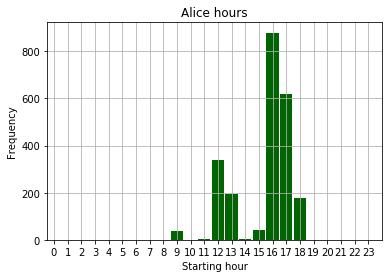

In [89]:
a = Alice['hour'].hist(color = 'darkgreen', bins = np.arange(0.5,24.5,1) , 
                                      align = 'mid', rwidth = 0.9)
plt.title('Alice hours')
plt.xticks(np.arange(0,24,1))
plt.xlim(-0.5, 24)
plt.xlabel('Starting hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

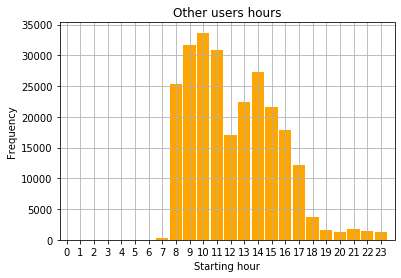

In [90]:
Not_Alice['hour'].hist(color = 'orange', bins = np.arange(0.5,24.5,1) , 
                                      align = 'mid', rwidth = 0.9)
plt.title('Other users hours')
plt.xticks(np.arange(0,24,1))
plt.xlim(-0.5, 24)
plt.xlabel('Starting hour')
plt.ylabel('Frequency')

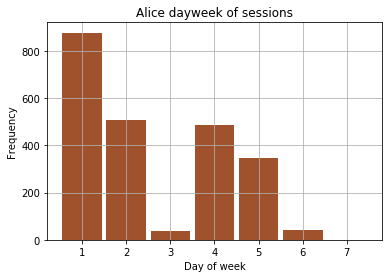

In [91]:
Alice['day_of_week'].hist(color = 'sienna', bins = np.arange(0.5,8.5,1) , 
                                      align = 'mid', rwidth = 0.9)
plt.title('Alice dayweek of sessions')
plt.xlabel('Day of week')
plt.ylabel('Frequency')
plt.show()

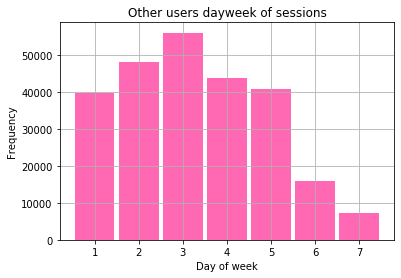

In [92]:
Not_Alice['day_of_week'].hist(color = 'hotpink', bins = np.arange(0.5,8.5,1) , 
                                      align = 'mid', rwidth = 0.9)
plt.title('Other users dayweek of sessions')
plt.xlabel('Day of week')
plt.ylabel('Frequency')
plt.show()

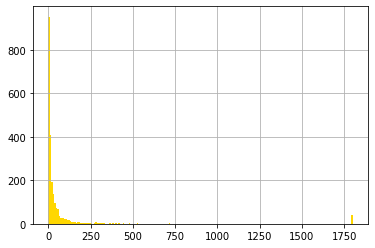

In [136]:
Alice['timespan'].hist(bins = 200, color = 'gold')

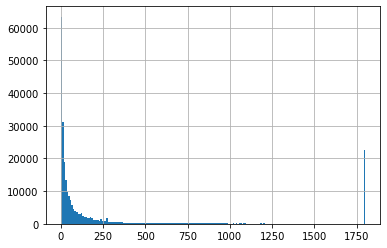

In [135]:
Not_Alice['timespan'].hist(bins = 200)

In [154]:
Alice[Alice['timespan'] >750]

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,site10,time10,target,hour,day_of_week,Evening,Sunday,timespan,Morning,Alice_starting
session_id,,,,,,,,,,,,,,,,,,,,,
6731,29,2014-02-25 17:37:02,29.0,2014-02-25 17:37:03,704.0,2014-02-25 17:37:04,704.0,2014-02-25 17:37:05,3000.0,2014-02-25 17:37:09,...,32.0,2014-02-25 17:50:48,1.0,17,2,0,0,826.0,0,0
9516,5301,2014-03-31 16:48:56,5301.0,2014-03-31 16:49:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,16,1,0,0,1800.0,0,0
11462,27247,2014-01-04 18:11:07,27247.0,2014-01-04 18:11:08,27247.0,2014-01-04 18:11:26,27247.0,2014-01-04 18:11:27,27247.0,2014-01-04 18:11:28,...,NaN,NaN,1.0,18,6,0,0,1800.0,0,0
23888,510,2014-02-17 18:14:31,515.0,2014-02-17 18:14:31,519.0,2014-02-17 18:14:32,1407.0,2014-02-17 18:14:32,NaN,NaN,...,NaN,NaN,1.0,18,1,0,0,1800.0,0,0
24773,170,2014-02-20 15:00:28,1074.0,2014-02-20 15:00:30,1074.0,2014-02-20 15:00:31,1074.0,2014-02-20 15:00:46,63.0,2014-02-20 15:02:51,...,NaN,NaN,1.0,15,4,0,0,1800.0,0,0
28763,80,2013-11-22 13:33:06,76.0,2013-11-22 13:33:13,80.0,2013-11-22 13:33:14,76.0,2013-11-22 13:33:16,80.0,2013-11-22 13:33:16,...,NaN,NaN,1.0,13,5,0,0,1800.0,0,0
30892,3000,2014-04-02 16:05:03,3000.0,2014-04-02 16:05:04,3000.0,2014-04-02 16:05:05,37.0,2014-04-02 16:05:19,39.0,2014-04-02 16:08:48,...,NaN,NaN,1.0,16,3,0,0,1800.0,0,0
43550,51,2014-03-20 13:28:04,3.0,2014-03-20 13:28:08,11.0,2014-03-20 13:28:08,27190.0,2014-03-20 13:28:08,8.0,2014-03-20 13:28:09,...,NaN,NaN,1.0,13,4,0,0,1800.0,0,0
43722,1,2014-01-28 14:14:19,63.0,2014-01-28 14:17:03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,14,2,0,0,1800.0,0,0


Как мы видим, на основе данных Alice не заходит в интернет в Воскресенье и по вечерам вообще.

Попробуем создать новые бинарные признаки:
1) Alice_starting (0 - не заходит в интернет после 18 часов и в 7,8,10 часов ; 1 - обратный случай). А также признаки Morning и Evening для этих же признааков по отдельности.

2) Sunday (0 - не воскресенье, 1 - воскресенье)

Такие признаки помогут обучить модель лучше ориентироваться на Alice.

(Такой набор появился непосредственным тестированием качества для разных комбинаций признаков)

In [140]:
def new_features(new_df, df):
    alstart = [1 if hour in [7,8, 10, 19,20,21,22,23,0] else 0 for hour in new_df['hour']]
    sunday = [1 if day==7 else 0 for day in new_df['day_of_week']]
    big_timespan = [1 if time > 750 and time!=1800 else 0 for time in new_df['timespan']]
    
    df['Alice_starting'] = alstart
    df['Sunday'] = sunday
    df['Big_timespan'] = big_timespan
    return(df)

In [141]:
final_df = new_features(new_df, train_test_df)
final_df.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time10,target,hour,day_of_week,Evening,Sunday,timespan,Morning,Alice_starting,Big_timespan
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,10,4,1,0,1800.0,1,1,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,...,2014-02-22 11:20:16,0.0,11,6,0,0,26.0,0,0,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,...,2013-12-16 16:40:24,0.0,16,1,0,0,7.0,0,0,0
4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,2014-03-28 10:54:12,...,2014-03-28 10:56:42,0.0,10,5,1,0,270.0,1,1,0
5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,2014-02-28 10:55:23,...,2014-02-28 10:57:11,0.0,10,5,1,0,246.0,1,1,0


In [118]:
from scipy.sparse import hstack, csr_matrix

In [150]:
Xnew = hstack([train_test_sparse, csr_matrix(final_df[['Alice_starting','Evening', 
                                                       'Morning', 'Sunday', 'Big_timespan']])]).tocsr()

In [151]:
Xnew_train = Xnew[:len(train_df)]
Xnew_test = Xnew[len(train_df):]

In [152]:
train_share = int(.7 * Xnew_train.shape[0])
X_train, y_train = Xnew_train[:train_share, :], y[:train_share]
X_valid, y_valid  = Xnew_train[train_share:, :], y[train_share:]

In [157]:
sgd_logit = SGDClassifier(loss = 'log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train)
roc_auc = roc_auc_score(y_valid, sgd_logit.predict_proba(X_valid)[:,1])
print('ROC-AUC score = %f' % roc_auc)

ROC-AUC score = 0.951075


Качество заметно возрасло.

In [156]:
sqd_reg = SGDClassifier(loss = 'log', random_state=17, n_jobs=-1, penalty = 'l1')
sqd_reg.fit(X_train, y_train)
roc_auc = roc_auc_score(y_valid, sqd_reg.predict_proba(X_valid)[:,1])
print('ROC-AUC score = %f' % roc_auc)

ROC-AUC score = 0.911806


Изменения регуляризатора на L1 не ухудшает качество.  Попробуем поиграться с гиперпараметрами.

In [188]:
hard_sqd = SGDClassifier(loss = 'log', random_state=17, n_jobs=-1, alpha = 0.00001, max_iter=10000)
hard_sqd.fit(X_train, y_train)
roc_auc = roc_auc_score(y_valid, hard_sqd.predict_proba(X_valid)[:,1])
print('ROC-AUC score = %f' % roc_auc)

ROC-AUC score = 0.963367


In [167]:
params_dict = {'alpha' : np.concatenate((np.logspace(-6, -3, 4), 
                                         5*np.logspace(-6, -3, 4))),#from 1e-6 to 1e-3 with 0.5*1e_pow increase
         'max_iter' : [500, 1000, 2000, 5000, 10000, 25000, 50000, 100000]}

In [177]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import time

In [180]:
%%time

sgd_grid = GridSearchCV(sgd_logit, params_dict)
sgd_grid.fit(X_train, y_train)
roc_auc = roc_auc_score(y_valid, sgd_grid.predict_proba(X_valid)[:,1])
print('ROC-AUC score = %f' % roc_auc)
print(sgd_grid.best_params_)

ROC-AUC score = 0.963367
{'alpha': 1e-05, 'max_iter': 500}
CPU times: user 1min 40s, sys: 1.93 s, total: 1min 42s
Wall time: 1min 11s


In [184]:
sgd_grid.cv_results_

{'mean_fit_time': array([1.05773457, 0.99504185, 0.94484258, 0.93319297, 0.95212984,
        1.13829136, 1.04280361, 1.05981088, 0.43898575, 0.4189287 ,
        0.37775429, 0.45892135, 0.43676233, 0.42819643, 0.35898765,
        0.39901988, 0.22905199, 0.21318165, 0.22949998, 0.19423763,
        0.21813305, 0.27401161, 0.25626262, 0.22088798, 0.18261107,
        0.18145641, 0.18104998, 0.18241088, 0.18510342, 0.18558121,
        0.18507624, 0.18441033, 0.42888133, 0.41859309, 0.40697026,
        0.40643469, 0.42319822, 0.41371902, 0.449622  , 0.41687314,
        0.22658634, 0.22664491, 0.22677032, 0.23142155, 0.22951969,
        0.23098135, 0.24380541, 0.23247615, 0.18718465, 0.18727398,
        0.18690292, 0.21610411, 0.19801672, 0.18973136, 0.18964314,
        0.19090549, 0.2087156 , 0.213679  , 0.21715426, 0.21572145,
        0.2118485 , 0.21105401, 0.22128995, 0.20651603]),
 'std_fit_time': array([0.18295532, 0.11578871, 0.0902698 , 0.08837915, 0.09530411,
        0.04672171, 0.112

Теперь попробуем обучиться на всей выборке.

In [190]:
sgd_grid1 = GridSearchCV(sgd_logit, params_dict)
sgd_grid1.fit(Xnew_train, y)
print(sgd_grid.best_params_)

{'alpha': 1e-05, 'max_iter': 500}


Лучшая модель такая же. Но отличаются ли предсказания? Если да, то можно засабмитить обе по отдельности и потом усреднить и посмотреть какая из них лучше

In [191]:
hard_sqd = SGDClassifier(loss = 'log', random_state=17, n_jobs=-1, alpha = 0.00001, max_iter=10000)
hard_sqd.fit(Xnew_train, y)

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=10000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=17, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [192]:
labels500 = sgd_grid1.predict_proba(Xnew_test)[:,1]
labels_hard = hard_sqd.predict_proba(Xnew_test)[:,1]

In [194]:
labels500 == labels_hard

array([False, False, False, ..., False, False, False])

Значения различны. Добавим усреднение

In [195]:
labels_mean = (labels500+labels_hard)/2

In [199]:
def write_to_submission_file(predicted_labels, out_file,
                             target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [200]:
write_to_submission_file(labels500, 'kaggleAlice500.csv')
write_to_submission_file(labels_hard, 'kaggleAliceHard.csv')
write_to_submission_file(labels_mean, 'kaggleAliceMean.csv')

**Итоговое наилучшее качество дал sgd500 = 0.93691**

## Критерии оценки работы (только для Peer Review в специализации):
- Правильные ли получились размерности матриц в п. 1? (max. 2 балла)
- Правильным ли получилось значения ROC AUC в п. 2? (max. 4 балла)
- Побит ли бенчмарк "sgd_logit_benchmark.csv" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)
- Побит ли бенчмарк "Logit +3 features" на публичной части рейтинга в соревновании Kaggle? (max. 2 балла)

## Пути улучшения
На этой неделе дается много времени на соревнование. Не забывайте вносить хорошие идеи, к которым Вы пришли по ходу соревнования, в описание финального проекта (`html`, `pdf` или `ipynb`). Это только в случае, если вы проходите специализацию.
Что можно попробовать:
 - Использовать ранее построенные признаки для улучшения модели (проверить их можно на меньшей выборке по 150 пользователям, отделив одного из пользователей от остальных – это быстрее)
 - Настроить параметры моделей (например, коэффициенты регуляризации)
 - Если позволяют мощности (или хватает терпения), можно попробовать смешивание (блендинг) ответов бустинга и линейной модели. [Вот](http://mlwave.com/kaggle-ensembling-guide/) один из самых известных тьюториалов по смешиванию ответов алгоритмов, также хороша [статья](https://alexanderdyakonov.wordpress.com/2017/03/10/cтекинг-stacking-и-блендинг-blending) Александра Дьяконова
 - Обратите внимание, что в соревновании также даны исходные данные о посещенных веб-страницах Элис и остальными 1557 пользователями (*train.zip*). По этим данным можно сформировать свою обучающую выборку. 

На 6 неделе мы пройдем большой тьюториал по Vowpal Wabbit и попробуем его в деле, на данных соревнования.